<h1 class="heading">TEST — 2</h1>
<h1>Reading JSBSim FDM config file</h1>

<h6 class="author"> — <b style="color:rgb(0,51,102);">Agostino De Marco</b>, <i>University of Naples Federico II</i></h6>

In [1]:
% run ./python/nb_init.py
% matplotlib inline

import numpy as np

import geography as geo
import data_handling as dh
from property_map import pmap
from MCSim import *

Aircraft FDM path: ./JSBSim/aircraft/c172x_unina_mod/
Full FDM file path: ./JSBSim/aircraft/c172x_unina_mod/c172x_unina_mod.xml
Searching for function: aero/function/ground-effect-factor-lift
Occurrences found: 1
Attribute: name="aero/function/ground-effect-factor-lift"
Searching for <tableData> in node
Occurrences found: 1
tableData content:

              0.0  1.203
              0.1  1.127
              0.15 1.090
              0.2  1.073
              0.3  1.046
              0.4  1.055
              0.5  1.019
              0.6  1.013
              0.7  1.008
              0.8  1.006
              0.9  1.003
              1.0  1.002
              1.1  1.0
            
DataFrame:
       0      1
0   0.00  1.203
1   0.10  1.127
2   0.15  1.090
3   0.20  1.073
4   0.30  1.046
5   0.40  1.055
6   0.50  1.019
7   0.60  1.013
8   0.70  1.008
9   0.80  1.006
10  0.90  1.003
11  1.00  1.002
12  1.10  1.000


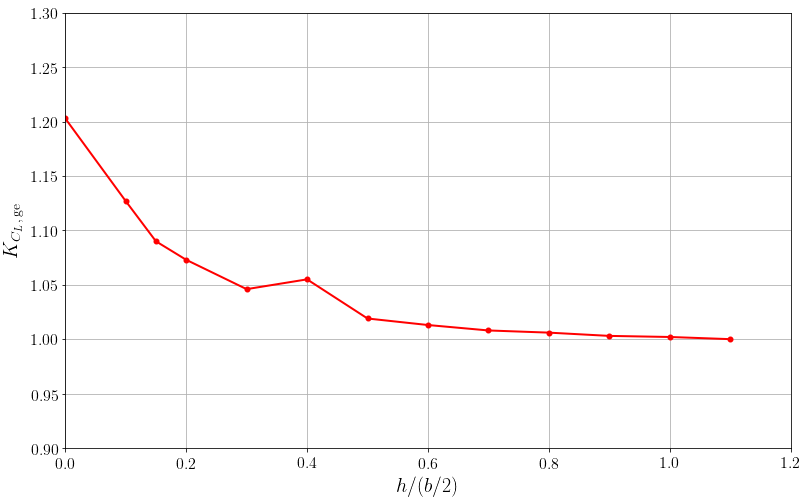

In [2]:
import lxml.etree

fdm_file = ConfigFile('c172x_unina_mod')
print("Aircraft FDM path: {0}".format(fdm_file.folderpath))
print("Full FDM file path: {0}".format(fdm_file.path))
fdm_tree = lxml.etree.parse(open(fdm_file.path))

func_name = 'aero/function/ground-effect-factor-lift'
print("Searching for function: {0}".format(func_name))

results = fdm_tree.xpath('//function[@name="aero/function/ground-effect-factor-lift"]')
print("Occurrences found: {0}".format(len(results)))
node = results[0]
print("Attribute: name=\"{0}\"".format(node.attrib["name"]))

print("Searching for <tableData> in node")
results2 = node.xpath('.//tableData') # a dot (.) in front to make the search relative to the current element
print("Occurrences found: {0}".format(len(results2)))

tableData_node = results2[0]
print("tableData content:")
print(tableData_node.text)

# trim white spaces from the front and the back
tableData_text = tableData_node.text.strip()
tableData_text.rstrip()

import sys
from io import StringIO
import pandas as pd

TESTDATA = StringIO(tableData_text)

df = pd.read_csv(TESTDATA, header=None, delimiter=r"\s+")

print("DataFrame:")
print(df)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax = df.plot(figsize=(13,8), x=0, y=1, style='.-', legend=False);
ax.set_xlabel(r'$h/(b/2)$')
ax.set_ylabel(r'$K_{C_L\,,\,\mathrm{ge}}$')
ax.set_xlim(0, 1.2)
ax.set_ylim(0.9, 1.3)
plt.grid()
plt.show()

In [10]:
# Reading from the c172x online fdm
#
# https://docs.python.org/3.6/howto/urllib2.html
from lxml import etree
from io import StringIO
import urllib.request

url = 'https://raw.githubusercontent.com/JSBSim-Team/jsbsim/master/aircraft/c172x/c172x.xml'

with urllib.request.urlopen(url) as response:
   fdm_tree = lxml.etree.parse(response.read())
    
results = fdm_tree.xpath('//function[@name="aero/function/ground-effect-factor-lift"]')
print("Occurrences found: {0}".format(len(results)))
node = results[0]
print("Attribute: name=\"{0}\"".format(node.attrib["name"]))

print("Searching for <tableData> in node")
results2 = node.xpath('.//tableData') # a dot (.) in front to make the search relative to the current element
print("Occurrences found: {0}".format(len(results2)))

tableData_node = results2[0]
print("tableData content:")
print(tableData_node.text)

# trim white spaces from the front and the back
tableData_text = tableData_node.text.strip()
tableData_text.rstrip()

OSError: Error reading file '<?xml version="1.0"?>
<?xml-stylesheet type="text/xsl" href="http://jsbsim.sourceforge.net/JSBSim.xsl"?>
<fdm_config name="Cessna C-172 Skyhawk II"  version="2.0" release="BETA"
    xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
    xsi:noNamespaceSchemaLocation="http://jsbsim.sourceforge.net/JSBSim.xsd">
    <fileheader>
        <author>Tony Peden</author>
        <license
          licenseName="GPL (General Public License)"
          licenseURL="http://www.gnu.org/licenses/gpl.html"/>
        <note>
          This model was created using publicly available data, publicly available
          technical reports, textbooks, and guesses. It contains no proprietary or
          restricted data. It has been validated only to the extent that it seems
          to "fly right", and possibly to comply to published, publicly known,
          performance data (maximum speed, endurance, etc.). Thus, this model
          is meant for educational and entertainment purposes only.

          This simulation model is not endorsed by the manufacturer. This model
          is not to be sold.
        </note>
        <filecreationdate>1999-01-01</filecreationdate>
        <version>$Revision: 1.91 $</version>
        <description>Models a 1982 Cessna 172P.</description>
      <reference
        refID=  "1"
        author= "Cessna Aircraft Company"
        title=  "Information Manual Skyhawk Model 172P"
        date=   "1982"/>
      <reference
        refID=  "2"
        author= "FAA"
        title=  "Type Certificate Data Sheet No. 3A12"
        date=   "5 May 2011"/>
    </fileheader>
    <metrics>
        <wingarea unit="FT2"> 174.0 </wingarea>
        <wingspan unit="FT"> 36.0 </wingspan>
        <chord unit="FT"> 4.9 </chord>
        <htailarea unit="FT2"> 21.9 </htailarea>
        <htailarm unit="FT"> 15.7 </htailarm>
        <vtailarea unit="FT2"> 16.5 </vtailarea>
        <vtailarm unit="FT"> 15.7 </vtailarm>
        <location name="AERORP" unit="IN">
            <x> 43.2 </x>
            <y> 0.0 </y>
            <z> 59.4 </z>
        </location>
        <location name="EYEPOINT" unit="IN">
            <x> 37.0 </x>
            <y> 0.0 </y>
            <z> 48.0 </z>
        </location>
        <location name="VRP" unit="IN">
            <x> 42.6 </x>
            <y> 0.0 </y>
            <z> 38.5 </z>
        </location>
    </metrics>
    <mass_balance>
        <ixx unit="SLUG*FT2"> 948.0 </ixx>
        <iyy unit="SLUG*FT2"> 1346.0 </iyy>
        <izz unit="SLUG*FT2"> 1967.0 </izz>
        <ixz unit="SLUG*FT2"> 0.0 </ixz>
        <emptywt unit="LBS"> 1454.0 </emptywt>
        <location name="CG" unit="IN">
            <x> 41.0 </x>
            <y> 0.0 </y>
            <z> 36.5 </z>
        </location>
        <pointmass name="PILOT">
            <weight unit="LBS">190.0</weight>
            <location unit="IN">
                <x> 36.0 </x>
                <y> -14.0 </y>
                <z> 24.0 </z>
            </location>
        </pointmass>
        <pointmass name="CO-PILOT">
            <weight unit="LBS">140.0</weight>
            <location unit="IN">
                <x> 36.0 </x>
                <y> 14.0 </y>
                <z> 24.0 </z>
            </location>
        </pointmass>
        <pointmass name="PASSENGER 1">
            <weight unit="LBS">130.0</weight>
            <location unit="IN">
                <x> 60.0 </x>
                <y> -14.0 </y>
                <z> 24.0 </z>
            </location>
        </pointmass>
        <pointmass name="PASSENGER 2">
            <weight unit="LBS">106.0</weight>
            <location unit="IN">
                <x> 60.0 </x>
                <y> 14.0 </y>
                <z> 24.0 </z>
            </location>
        </pointmass>
        <pointmass name="LUGGAGE">
            <weight unit="LBS">120.0</weight>
            <location unit="IN">
                <x> 95.0 </x>
                <y>  0.0 </y>
                <z> 24.0 </z>
            </location>
        </pointmass>
        <pointmass name="PesticideBomb">
            <weight unit="LBS">80.0</weight>
            <location unit="IN">
                <x>  41.0 </x>
                <y> 144.0 </y>
                <z> 36.0 </z>
            </location>
        </pointmass>
    </mass_balance>
    
    <ground_reactions>

        <contact type="BOGEY" name="Nose Gear">
            <location unit="IN">
                <x> -6.8 </x>
                <y> 0.0 </y>
                <z> -20.0 </z>
            </location>
            <static_friction>0.8</static_friction>
            <dynamic_friction>0.5</dynamic_friction>
            <rolling_friction>0.022</rolling_friction>
            <spring_coeff unit="LBS/FT">1800</spring_coeff>
            <damping_coeff unit="LBS/FT/SEC">500</damping_coeff>
            <damping_coeff_rebound unit="LBS/FT/SEC">2000</damping_coeff_rebound>
            <max_steer unit="DEG">10</max_steer>
            <brake_group>NONE</brake_group>
            <retractable>0</retractable>
        </contact>

        <contact type="BOGEY" name="Left Main Gear">
            <location unit="IN">
                <x> 58.2 </x>
                <y> -50.25 </y>
                <z> -18.46 </z>
            </location>
            <static_friction>0.8</static_friction>
            <dynamic_friction>0.5</dynamic_friction>
            <rolling_friction>0.022</rolling_friction>
            <spring_coeff unit="LBS/FT">5400</spring_coeff>
            <damping_coeff unit="LBS/FT/SEC">160</damping_coeff>
            <damping_coeff_rebound unit="LBS/FT/SEC">320</damping_coeff_rebound>
            <max_steer unit="DEG">0</max_steer>
            <brake_group>LEFT</brake_group>
            <retractable>0</retractable>
        </contact>

        <contact type="BOGEY" name="Right Main Gear">
            <location unit="IN">
                <x> 58.2 </x>
                <y> 50.25 </y>
                <z> -18.46 </z>
            </location>
            <static_friction>0.8</static_friction>
            <dynamic_friction>0.5</dynamic_friction>
            <rolling_friction>0.022</rolling_friction>
            <!-- This definition of the bogey strut compression force is exactly
                 equivalent to the definition of the left main gear. This
                 alternate definition is intented to serve as an example as well
                 as to help testing this feature -->
            <strut_force>
                <function>
                    <sum>
                        <product>
                            <value> -5400. </value>
                            <property> gear/unit[2]/compression-ft </property>
                        </product>
                        <ifthen>
                            <ge>
                                <property> gear/unit[2]/compression-velocity-fps </property>
                                <value> 0.0 </value>
                            </ge>
                            <product>
                                <value> -160. </value>
                                <property> gear/unit[2]/compression-velocity-fps </property>
                            </product>
                            <product>
                                <value> -320. </value>
                                <property> gear/unit[2]/compression-velocity-fps </property>
                            </product>
                        </ifthen>
                    </sum>
                </function>
            </strut_force>
            <max_steer unit="DEG">0</max_steer>
            <brake_group>RIGHT</brake_group>
            <retractable>0</retractable>
        </contact>

        <contact type="STRUCTURE" name="TAIL_SKID">
            <location unit="IN">
                <x> 188.0 </x>
                <y> 0.0 </y>
                <z> 8.0 </z>
            </location>
            <static_friction>0.2</static_friction>
            <dynamic_friction>0.2</dynamic_friction>
            <spring_coeff unit="LBS/FT">20000</spring_coeff>
            <damping_coeff unit="LBS/FT/SEC">1000</damping_coeff>
        </contact>

        <contact type="STRUCTURE" name="LEFT_TIP">
            <location unit="IN">
                <x> 43.2 </x>
                <y> -214.8 </y>
                <z> 59.4 </z>
            </location>
            <static_friction>0.2</static_friction>
            <dynamic_friction>0.2</dynamic_friction>
            <spring_coeff unit="LBS/FT">10000</spring_coeff>
            <damping_coeff unit="LBS/FT/SEC">2000</damping_coeff>
        </contact>
        <contact type="STRUCTURE" name="RIGHT_TIP">
            <location unit="IN">
                <x> 43.2 </x>
                <y> 214.8 </y>
                <z> 59.4 </z>
            </location>
            <static_friction>0.2</static_friction>
            <dynamic_friction>0.2</dynamic_friction>
            <spring_coeff unit="LBS/FT">10000</spring_coeff>
            <damping_coeff unit="LBS/FT/SEC">2000</damping_coeff>
        </contact>
    </ground_reactions>
    <propulsion>
        <engine file="eng_io320">
            <location unit="IN">
                <x>-19.7</x>
                <y>0</y>
                <z>26.6</z>
            </location>
            <orient unit="DEG">
                <roll>0</roll>
                <pitch>0</pitch>
                <yaw>0</yaw>
            </orient>
            <feed>0</feed>
            <feed>1</feed>
            <thruster file="prop_75in2f">
                <location unit="IN">
                    <x>-37.7</x>
                    <y>0</y>
                    <z>26.6</z>
                </location>
                <orient unit="DEG">
                    <roll>0</roll>
                    <pitch>0</pitch>
                    <yaw>0</yaw>
                </orient>
                <sense>-1</sense>
                <p_factor>10.0</p_factor>
            </thruster>
        </engine>
        <tank type="FUEL">    <!-- Tank number 0 -->
            <location unit="IN">
                <x>48.0</x>
                <y>-112.0</y>
                <z>59.4</z>
            </location>
            <radius unit="IN">29.4</radius>
            <capacity unit="LBS">130</capacity>
            <contents unit="LBS">130</contents>
        </tank>
        <tank type="FUEL">    <!-- Tank number 1 -->
            <location unit="IN">
                <x>48.0</x>
                <y>112.0</y>
                <z>59.4</z>
            </location>
            <radius unit="IN">29.4</radius>
            <capacity unit="LBS">130</capacity>
            <contents unit="LBS">130</contents>
        </tank>
    </propulsion>
    
    <system name="Navigation">
      <channel name="Heading">
        <sensor name="navigation/actual-heading-rad">
          <input> attitude/heading-true-rad </input>
<!--          <lag> 2500 </lag> -->
<!--          <noise variation="PERCENT"> .02 </noise> -->
          <bias> 0.003 </bias>
        </sensor>
      </channel>
    </system>

    <system name="Mixture control">
      <!--
      E = 1.3 * Mixture * P_std / P_amb
  
      Mixture = (P_amb / P_std) / 1.3
      -->
      <channel name="Automatic Mixture Control">
        <fcs_function name="systems/mixture-cmd-norm">
          <function>
            <quotient>
              <table>
                <independentVar lookup="row">atmosphere/P-psf</independentVar>
                <tableData>
                     0  0.0
                  2117  1.0
                </tableData>
              </table>
              <value>1.0</value>
            </quotient>
          </function>
          <output>fcs/mixture-cmd-norm</output>
        </fcs_function>
      </channel>
    </system>
  
    <system file="GNCUtilities"/>

    <system file="Autopilot">
      <property value="0.523"> guidance/roll-angle-limit </property>
      <property value="0.174"> guidance/roll-rate-limit </property>
    </system>
    
    <autopilot file="c172ap"/>

    <flight_control name="c172">
        <channel name="Pitch">
            <summer name="fcs/pitch-trim-sum">
                <input>ap/elevator_cmd</input>
                <input>fcs/elevator-cmd-norm</input>
                <input>fcs/pitch-trim-cmd-norm</input>
                <clipto>
                    <min>-1</min>
                    <max> 1</max>
                </clipto>
            </summer>

            <!--
            Map the -1 to +1 input into the range specified below, then
            multiply by 0.01745 to convert to radians
            -->
            <aerosurface_scale name="fcs/elevator-control">
                <input>fcs/pitch-trim-sum</input>
                <range>
                    <min>-28</min>
                    <max> 23</max>
                </range>
                <gain>0.01745</gain>
            </aerosurface_scale>

            <actuator name="fcs/elevator-actuator">
              <input> fcs/elevator-control </input>
              <lag> 60 </lag>
              <bias> 0.002 </bias>
              <hysteresis_width> 0.05 </hysteresis_width>
              <clipto>
                <!-- +/- 20 degrees -->
                <min> -0.34 </min>
                <max>  0.34 </max>
              </clipto>
              <output>fcs/elevator-pos-rad</output>
            </actuator>

        </channel>

        <channel name="Roll">

            <summer name="fcs/roll-trim-sum">
<!--                <input>ap/aileron_cmd</input> -->
                <input>ap/roll-cmd-norm-output</input>
                <input>fcs/aileron-cmd-norm</input>
                <input>fcs/roll-trim-cmd-norm</input>
                <clipto>
                    <min>-1</min>
                    <max>1</max>
                </clipto>
            </summer>

            <aerosurface_scale name="fcs/left-aileron-control">
              <description> The output from this control is in radians. </description>
              <input>fcs/roll-trim-sum</input>
              <gain>0.01745</gain>
              <range>
                <min>-20</min>
                <max> 15</max>
              </range>
            </aerosurface_scale>
    
            <actuator name="fcs/left-aileron-actuator">
              <description> The input to this actuator is in radians. </description>
              <input> fcs/left-aileron-control </input>
              <rate_limit> 1.57 </rate_limit>
              <hysteresis> 0.005 </hysteresis>
              <clipto>
                <min> -0.350 </min>
                <max>  0.260 </max>
              </clipto>
              <output>fcs/left-aileron-pos-rad</output>
            </actuator>
            
            <aerosurface_scale name="fcs/right-aileron-control">
              <description> The output from this control is in radians. </description>
              <input>-fcs/roll-trim-sum</input>
              <gain>0.01745</gain>
              <range>
                <min>-20</min>
                <max> 15</max>
              </range>
            </aerosurface_scale>

            <actuator name="fcs/right-aileron-actuator">
              <description> The input to this actuator is in radians. </description>
              <input> fcs/right-aileron-control </input>
              <rate_limit> 1.57 </rate_limit>
              <hysteresis> 0.005 </hysteresis>
              <clipto>
                <min> -0.350 </min>
                <max>  0.260 </max>
              </clipto>
              <output>fcs/right-aileron-pos-rad</output>
            </actuator>
            
            <summer name="fcs/effective-aileron-pos">
              <input> fcs/left-aileron-pos-rad </input>
              <input> -fcs/right-aileron-pos-rad </input>
              <gain> 0.5 </gain>
            </summer>
            
        </channel>

        <channel name="Yaw">
            <summer name="fcs/yaw-trim-sum">
                <input>fcs/rudder-cmd-norm</input>
                <input>fcs/yaw-trim-cmd-norm</input>
                <clipto>
                    <min>-1</min>
                    <max>1</max>
                </clipto>
            </summer>
            <aerosurface_scale name="fcs/rudder-control">
                <input>fcs/yaw-trim-sum</input>
                <gain>0.01745</gain>
                <range>
                    <min>-16</min>
                    <max> 16</max>
                </range>
                <output>fcs/rudder-pos-rad</output>
            </aerosurface_scale>
        </channel>
        <channel name="Flaps">
            <kinematic name="fcs/flaps-control">
                <input>fcs/flap-cmd-norm</input>
                <traverse>
                    <setting>
                       <position> 0 </position>
                       <time> 0 </time>
                    </setting>
                    <setting>
                       <position> 10 </position>
                       <time> 2 </time>
                    </setting>
                    <setting>
                       <position> 20 </position>
                       <time> 1 </time>
                    </setting>
                    <setting>
                       <position> 30 </position>
                       <time> 1 </time>
                    </setting>
                </traverse>
                <output>fcs/flap-pos-deg</output>
            </kinematic>
            <aerosurface_scale name="fcs/flap-position-normalizer">
              <input>fcs/flap-pos-deg</input>
              <domain>
                <min>0</min>  <!-- Flaps actual minimum position -->
                <max>30</max>  <!-- Flaps actual maximum position -->
              </domain>
              <range>
                <min>0</min>  <!-- Flaps normalized minimum position -->
                <max>1</max>  <!-- Flaps normalized maximum position -->
              </range>
              <output>fcs/flap-pos-norm</output>
            </aerosurface_scale>
        </channel>
    </flight_control>

    <aerodynamics>

        <alphalimits unit="RAD">
            <min>-0.087</min>
            <max>0.28</max>
        </alphalimits>

        <hysteresis_limits unit="RAD">
            <min>0.09</min>
            <max>0.36</max>
        </hysteresis_limits>

        <!-- aerodynamic subsystem variables for convenience -->

      <function name="aero/angle/right_wing_tip_alpha">
        <description>
          This parameter calculates the angle of attack at the right wingtip,
          accounting for the motion of the wing at that point away from the CG.
        </description>
        <atan2>
          <sum>
            <property>velocities/w-aero-fps</property>
            <product>
              <property>velocities/p-aero-rad_sec</property>
              <value>14</value> <!-- distance in feet from CG to wingtip -->
            </product>
          </sum>
          <difference>
            <property>velocities/u-aero-fps</property>
            <product>
              <property>velocities/r-aero-rad_sec</property>
              <value>50</value>
            </product>
          </difference>
        </atan2>
      </function>

      <function name="aero/function/ground-effect-factor-lift">
            <description>Change in lift due to ground effect factor.</description>
            <table>
                <independentVar>aero/h_b-mac-ft</independentVar> <!-- row lookup -->
                <tableData>
                    0.0  1.203
                    0.1  1.127
                    0.15 1.090
                    0.2  1.073
                    0.3  1.046
                    0.4  1.028
                    0.5  1.019
                    0.6  1.013
                    0.7  1.008
                    0.8  1.006
                    0.9  1.003
                    1.0  1.002
                    1.1  1.0
                </tableData>
            </table>
        </function>

        <function name="aero/function/ground-effect-factor-drag">
            <description>Change in drag due to ground effect</description>
            <table>
                <independentVar>aero/h_b-mac-ft</independentVar>
                <tableData>
                    0.0  0.480
                    0.1  0.515
                    0.15 0.629
                    0.2  0.709
                    0.3  0.815
                    0.4  0.882
                    0.5  0.928
                    0.6  0.962
                    0.7  0.988
                    0.8  1.0
                    0.9  1.0
                    1.0  1.0
                    1.1  1.0
                </tableData>
            </table>
        </function>

        <axis name="LIFT">

            <!-- Lift axis coefficients functions -->

            <function name="aero/coefficient/CLwbh">
                <description>Lift due to alpha</description>
                <product>
                    <property>aero/function/ground-effect-factor-lift</property>
                    <property>aero/qbar-area</property>
                    <table>
                        <independentVar lookup="row">aero/alpha-rad</independentVar>
                        <independentVar lookup="column">aero/stall-hyst-norm</independentVar>
                        <tableData>
                                   0.0   1.0
                            -0.09 -0.22 -0.22
                             0.0   0.25  0.25
                             0.09  0.73  0.73
                             0.1   0.83  0.78
                             0.12  0.92  0.79
                             0.14  1.02  0.81
                             0.16  1.08  0.82
                             0.17  1.13  0.83
                             0.19  1.19  0.85
                             0.21  1.25  0.86
                             0.24  1.35  0.88
                             0.26  1.44  0.9
                             0.28  1.47  0.92
                             0.3   1.43  0.95
                             0.32  1.38  0.99
                             0.34  1.3   1.05
                             0.36  1.15  1.15
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/CLDf">
                <description>Delta lift due to flap deflection</description>
                <product>
                    <property>aero/function/ground-effect-factor-lift</property>
                    <property>aero/qbar-area</property>
                    <table>
                        <independentVar>fcs/flap-pos-deg</independentVar>
                        <tableData>
                            0.0  0.0
                           10.0  0.25
                           20.0  0.30
                           30.0  0.35
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/CLDe">
                <description>Lift due to Elevator Deflection.</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>fcs/elevator-pos-rad</property>
                    <value>0.347</value>
                </product>
            </function>

            <function name="aero/coefficient/CLadot">
                <description>Lift due to alpha rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>aero/alphadot-rad_sec</property>
                    <property>aero/ci2vel</property>
                    <value>1.7</value>
                </product>
            </function>

            <function name="aero/coefficient/CLq">
                <description>Lift due to pitch rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>velocities/q-aero-rad_sec</property>
                    <property>aero/ci2vel</property>
                    <value>3.9</value>
                </product>
            </function>

    <function name="aero/coefficient/CLalpha">
      <description>Lift per radian of Alpha</description>
      <product>
        <property>aero/qbar-area</property>
        <property>aero/alpha-rad</property>
        <table>
          <independentVar lookup="row">aero/alpha-deg</independentVar>
          <independentVar lookup="column">aero/beta-deg</independentVar>
          <independentVar lookup="table">fcs/flap-pos-deg</independentVar>
          <tableData breakPoint="-5">
                      -10.000000   -5.000000   -4.000000   -3.000000   -2.000000   -1.000000    0.000000    1.000000    2.000000    3.000000    4.000000    5.000000   10.000000
          -10.000000    4.579224    4.683079    4.695652    4.705446    4.712455    4.716665    4.718074    4.716681    4.712483    4.705490    4.695709    4.683151    4.579366
           -9.000000    4.588575    4.692626    4.705221    4.715036    4.722056    4.726275    4.727687    4.726290    4.722086    4.715080    4.705281    4.692699    4.588721
           -8.000000    4.594747    4.698920    4.711531    4.721357    4.728385    4.732611    4.734025    4.732626    4.728416    4.721402    4.711592    4.698996    4.594897
           -7.000000    4.597723    4.701945    4.714562    4.724392    4.731425    4.735653    4.737066    4.735669    4.731457    4.724439    4.714625    4.702023    4.597878
           -6.000000    4.597490    4.701688    4.714302    4.724130    4.731162    4.735388    4.736802    4.735404    4.731195    4.724177    4.714366    4.701768    4.597648
           -5.000000    4.594041    4.698139    4.710741    4.720562    4.727585    4.731808    4.733220    4.731825    4.727618    4.720610    4.710807    4.698220    4.594201
           -4.000000    4.587374    4.691299    4.703880    4.713682    4.720695    4.724911    4.726322    4.724928    4.720729    4.713732    4.703947    4.691382    4.587537
           -3.000000    4.577491    4.681170    4.693721    4.703501    4.710497    4.714704    4.716111    4.714720    4.710532    4.703551    4.693788    4.681253    4.577657
           -2.000000    4.564407    4.667766    4.680278    4.690028    4.697003    4.701195    4.702599    4.701213    4.697039    4.690079    4.680347    4.667851    4.564577
           -1.000000    4.548137    4.651103    4.663567    4.673279    4.680228    4.684404    4.685803    4.684422    4.680264    4.673332    4.663638    4.651189    4.548309
            0.000000    4.528703    4.631201    4.643609    4.653277    4.660196    4.664353    4.665745    4.664372    4.660232    4.653332    4.643680    4.631289    4.528878
            1.000000    4.506134    4.608094    4.620437    4.630056    4.636937    4.641072    4.642456    4.641090    4.636972    4.630109    4.620509    4.608183    4.506310
            2.000000    4.480464    4.581812    4.594082    4.603642    4.610483    4.614594    4.615971    4.614612    4.610519    4.603697    4.594154    4.581903    4.480642
            3.000000    4.451731    4.552399    4.564587    4.574084    4.580878    4.584962    4.586330    4.584980    4.580915    4.574139    4.564660    4.552491    4.451910
            4.000000    4.419983    4.519904    4.531998    4.541425    4.548169    4.552222    4.553580    4.552240    4.548207    4.541480    4.532073    4.519995    4.420165
            5.000000    4.385270    4.484371    4.496370    4.505717    4.512407    4.516426    4.517773    4.516445    4.512444    4.505773    4.496444    4.484464    4.385452
            6.000000    4.347646    4.445863    4.457754    4.467019    4.473649    4.477633    4.478968    4.477653    4.473686    4.467075    4.457829    4.445956    4.347829
            7.000000    4.307175    4.404442    4.416217    4.425392    4.431959    4.435905    4.437226    4.435924    4.431995    4.425449    4.416293    4.404535    4.307361
            8.000000    4.263923    4.360175    4.371828    4.380909    4.387405    4.391310    4.392619    4.391329    4.387443    4.380964    4.371903    4.360269    4.264108
            9.000000    4.217959    4.313137    4.324659    4.333638    4.340064    4.343924    4.345218    4.343943    4.340101    4.333694    4.324735    4.313231    4.218145
           10.000000    4.169363    4.263402    4.274788    4.283659    4.290007    4.293822    4.295101    4.293842    4.290045    4.283715    4.274863    4.263497    4.169548
          </tableData>
          <tableData breakPoint="0">
                      -10.000000   -5.000000   -4.000000   -3.000000   -2.000000   -1.000000    0.000000    1.000000    2.000000    3.000000    4.000000    5.000000   10.000000
          -10.000000    4.589282    4.693370    4.705971    4.715788    4.722813    4.727033    4.728446    4.727047    4.722842    4.715832    4.706029    4.693441    4.589424
           -9.000000    4.596830    4.701072    4.713692    4.723524    4.730558    4.734784    4.736198    4.734799    4.730588    4.723568    4.713749    4.701145    4.596976
           -8.000000    4.601193    4.705514    4.718144    4.727984    4.735023    4.739254    4.740670    4.739269    4.735054    4.728030    4.718205    4.705591    4.601343
           -7.000000    4.602358    4.706686    4.719318    4.729158    4.736198    4.740429    4.741846    4.740445    4.736230    4.729205    4.719379    4.706765    4.602511
           -6.000000    4.600316    4.704578    4.717200    4.727036    4.734071    4.738299    4.739714    4.738316    4.734103    4.727083    4.717264    4.704659    4.600473
           -5.000000    4.595062    4.699183    4.711790    4.721610    4.728637    4.732861    4.734273    4.732878    4.728670    4.721659    4.711854    4.699265    4.595222
           -4.000000    4.586600    4.690507    4.703087    4.712888    4.719900    4.724114    4.725524    4.724130    4.719934    4.712938    4.703153    4.690591    4.586764
           -3.000000    4.574937    4.678556    4.691101    4.700875    4.707868    4.712070    4.713478    4.712088    4.707902    4.700926    4.691169    4.678641    4.575104
           -2.000000    4.560090    4.663347    4.675848    4.685589    4.692557    4.696744    4.698147    4.696764    4.692592    4.685639    4.675917    4.663433    4.560259
           -1.000000    4.542077    4.644899    4.657348    4.667047    4.673987    4.678157    4.679554    4.678176    4.674023    4.667101    4.657418    4.644987    4.542249
            0.000000    4.520925    4.623242    4.635628    4.645279    4.652185    4.656336    4.657724    4.656353    4.652222    4.645333    4.635699    4.623330    4.521099
            1.000000    4.496665    4.598403    4.610722    4.620319    4.627185    4.631311    4.632694    4.631329    4.627221    4.620373    4.610793    4.598493    4.496842
            2.000000    4.469336    4.570426    4.582664    4.592200    4.599024    4.603125    4.604497    4.603143    4.599059    4.592256    4.582737    4.570517    4.469513
            3.000000    4.438980    4.539352    4.551503    4.560972    4.567746    4.571819    4.573182    4.571837    4.567783    4.561028    4.551577    4.539443    4.439159
            4.000000    4.405647    4.505233    4.517289    4.526683    4.533405    4.537445    4.538797    4.537463    4.533442    4.526739    4.517363    4.505325    4.405828
            5.000000    4.369390    4.468122    4.480074    4.489388    4.496053    4.500057    4.501400    4.500077    4.496089    4.489444    4.480150    4.468214    4.369572
            6.000000    4.330268    4.428081    4.439922    4.449149    4.455751    4.459719    4.461048    4.459738    4.455789    4.449206    4.439997    4.428173    4.330451
            7.000000    4.288345    4.385174    4.396897    4.406031    4.412567    4.416495    4.417811    4.416514    4.412604    4.406087    4.396972    4.385268    4.288529
            8.000000    4.243692    4.339475    4.351070    4.360106    4.366571    4.370458    4.371759    4.370477    4.366609    4.360162    4.351146    4.339568    4.243878
            9.000000    4.196383    4.291057    4.302519    4.311450    4.317842    4.321683    4.322969    4.321702    4.317879    4.311508    4.302596    4.291151    4.196568
           10.000000    4.146493    4.240001    4.251324    4.260144    4.266455    4.270250    4.271521    4.270268    4.266494    4.260201    4.251398    4.240096    4.146679
          </tableData>
          <tableData breakPoint="10">
                      -10.000000   -5.000000   -4.000000   -3.000000   -2.000000   -1.000000    0.000000    1.000000    2.000000    3.000000    4.000000    5.000000   10.000000
          -10.000000    4.600350    4.704696    4.717329    4.727169    4.734210    4.738441    4.739857    4.738456    4.734239    4.727213    4.717385    4.704768    4.600493
           -9.000000    4.604290    4.708706    4.721347    4.731195    4.738241    4.742475    4.743892    4.742488    4.738271    4.731240    4.721406    4.708780    4.604437
           -8.000000    4.605043    4.709454    4.722095    4.731943    4.738989    4.743223    4.744639    4.743238    4.739020    4.731988    4.722156    4.709531    4.605193
           -7.000000    4.602602    4.706936    4.719568    4.729407    4.736449    4.740679    4.742096    4.740695    4.736480    4.729455    4.719630    4.707014    4.602754
           -6.000000    4.596964    4.701149    4.713761    4.723588    4.730619    4.734845    4.736259    4.734861    4.730652    4.723637    4.713826    4.701229    4.597121
           -5.000000    4.588136    4.692097    4.704681    4.714488    4.721505    4.725720    4.727131    4.725736    4.721537    4.714537    4.704746    4.692177    4.588297
           -4.000000    4.576126    4.679790    4.692339    4.702118    4.709113    4.713316    4.714725    4.713334    4.709146    4.702167    4.692405    4.679873    4.576290
           -3.000000    4.560950    4.664243    4.676748    4.686492    4.693463    4.697653    4.699054    4.697670    4.693497    4.686543    4.676816    4.664327    4.561117
           -2.000000    4.542632    4.645484    4.657935    4.667637    4.674578    4.678750    4.680146    4.678768    4.674612    4.667689    4.658003    4.645569    4.542800
           -1.000000    4.521197    4.623537    4.635924    4.645578    4.652485    4.656635    4.658026    4.656653    4.652520    4.645630    4.635994    4.623624    4.521369
            0.000000    4.496681    4.598433    4.610752    4.620350    4.627219    4.631345    4.632727    4.631364    4.627254    4.620403    4.610823    4.598522    4.496855
            1.000000    4.469121    4.570219    4.582459    4.591996    4.598819    4.602920    4.604292    4.602938    4.598855    4.592049    4.582530    4.570308    4.469297
            2.000000    4.438562    4.538937    4.551088    4.560557    4.567332    4.571404    4.572768    4.571423    4.567368    4.560611    4.551160    4.539027    4.438740
            3.000000    4.405053    4.504637    4.516693    4.526087    4.532808    4.536848    4.538201    4.536866    4.532845    4.526142    4.516766    4.504727    4.405232
            4.000000    4.368651    4.467377    4.479330    4.488643    4.495306    4.499311    4.500653    4.499330    4.495343    4.488697    4.479403    4.467469    4.368833
            5.000000    4.329416    4.427218    4.439059    4.448286    4.454886    4.458855    4.460183    4.458873    4.454924    4.448341    4.439134    4.427310    4.329598
            6.000000    4.287412    4.384228    4.395949    4.405082    4.411618    4.415544    4.416860    4.415564    4.411654    4.405138    4.396023    4.384321    4.287594
            7.000000    4.242708    4.338476    4.350071    4.359104    4.365569    4.369453    4.370756    4.369473    4.365606    4.359160    4.350146    4.338569    4.242893
            8.000000    4.195382    4.290040    4.301502    4.310431    4.316820    4.320662    4.321947    4.320680    4.316858    4.310487    4.301577    4.290134    4.195567
            9.000000    4.145512    4.239004    4.250323    4.259142    4.265453    4.269246    4.270517    4.269264    4.265491    4.259199    4.250398    4.239098    4.145698
           10.000000    4.093179    4.185447    4.196619    4.205323    4.211551    4.215295    4.216550    4.215314    4.211590    4.205380    4.196694    4.185541    4.093364
          </tableData>
          <tableData breakPoint="20">
                      -10.000000   -5.000000   -4.000000   -3.000000   -2.000000   -1.000000    0.000000    1.000000    2.000000    3.000000    4.000000    5.000000   10.000000
          -10.000000    4.599356    4.703678    4.716308    4.726148    4.733187    4.737417    4.738831    4.737432    4.733215    4.726190    4.716364    4.703750    4.599497
           -9.000000    4.599688    4.703996    4.716622    4.726461    4.733500    4.737729    4.739145    4.737744    4.733530    4.726505    4.716681    4.704069    4.599833
           -8.000000    4.596838    4.701059    4.713677    4.723506    4.730539    4.734766    4.736180    4.734780    4.730570    4.723552    4.713737    4.701134    4.596988
           -7.000000    4.590811    4.694872    4.707469    4.717285    4.724307    4.728527    4.729940    4.728543    4.724337    4.717331    4.707532    4.694949    4.590965
           -6.000000    4.581611    4.685439    4.698008    4.707802    4.714808    4.719019    4.720428    4.719035    4.714840    4.707849    4.698071    4.685518    4.581768
           -5.000000    4.569251    4.672771    4.685304    4.695068    4.702055    4.706254    4.707658    4.706270    4.702088    4.695117    4.685370    4.672852    4.569410
           -4.000000    4.553747    4.656890    4.669376    4.679106    4.686066    4.690249    4.691650    4.690266    4.686099    4.679155    4.669444    4.656973    4.553910
           -3.000000    4.535124    4.637816    4.650249    4.659935    4.666865    4.671030    4.672424    4.671047    4.666900    4.659986    4.650315    4.637899    4.535289
           -2.000000    4.513410    4.615582    4.627950    4.637589    4.644485    4.648628    4.650015    4.648644    4.644518    4.637640    4.628019    4.615668    4.513579
           -1.000000    4.488641    4.590220    4.602519    4.612101    4.618957    4.623076    4.624457    4.623093    4.618992    4.612153    4.602588    4.590308    4.488812
            0.000000    4.460856    4.561776    4.573993    4.583513    4.590325    4.594419    4.595788    4.594435    4.590360    4.583567    4.574064    4.561864    4.461030
            1.000000    4.430103    4.530293    4.542422    4.551873    4.558636    4.562699    4.564061    4.562717    4.558672    4.551928    4.542493    4.530383    4.430279
            2.000000    4.396430    4.495824    4.507858    4.517234    4.523942    4.527975    4.529325    4.527993    4.523979    4.517288    4.507930    4.495914    4.396607
            3.000000    4.359896    4.458428    4.470357    4.479651    4.486302    4.490300    4.491638    4.490319    4.486338    4.479707    4.470430    4.458519    4.360075
            4.000000    4.320561    4.418168    4.429985    4.439193    4.445780    4.449740    4.451066    4.449758    4.445817    4.439247    4.430058    4.418259    4.320742
            5.000000    4.278492    4.375110    4.386806    4.395920    4.402442    4.406362    4.407675    4.406381    4.402479    4.395976    4.386881    4.375202    4.278674
            6.000000    4.233758    4.329326    4.340896    4.349912    4.356362    4.360240    4.361538    4.360259    4.356400    4.349968    4.340970    4.329419    4.233942
            7.000000    4.186437    4.280896    4.292331    4.301242    4.307618    4.311450    4.312735    4.311469    4.307655    4.301299    4.292407    4.280989    4.186621
            8.000000    4.136607    4.229898    4.241193    4.249994    4.256291    4.260077    4.261344    4.260096    4.256328    4.250051    4.241269    4.229992    4.136791
            9.000000    4.084353    4.176423    4.187569    4.196256    4.202471    4.206205    4.207458    4.206225    4.202508    4.196313    4.187644    4.176516    4.084538
           10.000000    4.029764    4.120556    4.131549    4.140115    4.146243    4.149927    4.151161    4.149946    4.146281    4.140171    4.131624    4.120651    4.029948
          </tableData>
          <tableData breakPoint="30">
                      -10.000000   -5.000000   -4.000000   -3.000000   -2.000000   -1.000000    0.000000    1.000000    2.000000    3.000000    4.000000    5.000000   10.000000
          -10.000000    4.586298    4.690317    4.702909    4.712720    4.719739    4.723957    4.725368    4.723971    4.719768    4.712763    4.702966    4.690388    4.586439
           -9.000000    4.583019    4.686939    4.699520    4.709322    4.716335    4.720548    4.721958    4.720563    4.716364    4.709367    4.699579    4.687013    4.583165
           -8.000000    4.576579    4.680328    4.692889    4.702674    4.709675    4.713883    4.715290    4.713898    4.709706    4.702720    4.692949    4.680404    4.576728
           -7.000000    4.566987    4.670493    4.683024    4.692787    4.699771    4.703969    4.705375    4.703985    4.699803    4.692834    4.683086    4.670570    4.567140
           -6.000000    4.554257    4.657447    4.669940    4.679673    4.686637    4.690822    4.692222    4.690837    4.686669    4.679721    4.670004    4.657526    4.554414
           -5.000000    4.538408    4.641211    4.653656    4.663353    4.670291    4.674460    4.675857    4.674477    4.670323    4.663402    4.653721    4.641292    4.538567
           -4.000000    4.519464    4.621809    4.634200    4.643853    4.650760    4.654911    4.656301    4.654927    4.650794    4.643903    4.634265    4.621892    4.519626
           -3.000000    4.497457    4.599273    4.611600    4.621204    4.628075    4.632205    4.633587    4.632222    4.628109    4.621254    4.611667    4.599357    4.497622
           -2.000000    4.472424    4.573642    4.585896    4.595443    4.602274    4.606380    4.607756    4.606398    4.602309    4.595495    4.585965    4.573728    4.472592
           -1.000000    4.444407    4.544957    4.557131    4.566615    4.573402    4.577480    4.578846    4.577497    4.573438    4.566668    4.557199    4.545043    4.444577
            0.000000    4.413451    4.513267    4.525351    4.534767    4.541503    4.545552    4.546910    4.545570    4.541539    4.534819    4.525421    4.513354    4.413623
            1.000000    4.379609    4.478625    4.490613    4.499954    4.506636    4.510653    4.511998    4.510670    4.506671    4.500007    4.490684    4.478714    4.379784
            2.000000    4.342940    4.441091    4.452973    4.462232    4.468857    4.472839    4.474172    4.472857    4.468893    4.462287    4.453045    4.441180    4.343118
            3.000000    4.303506    4.400725    4.412497    4.421668    4.428230    4.432174    4.433496    4.432193    4.428266    4.421722    4.412570    4.400817    4.303684
            4.000000    4.261374    4.357604    4.369254    4.378332    4.384827    4.388731    4.390039    4.388750    4.384863    4.378387    4.369328    4.357695    4.261554
            5.000000    4.216615    4.311793    4.323317    4.332294    4.338719    4.342581    4.343875    4.342600    4.338757    4.332351    4.323391    4.311885    4.216798
            6.000000    4.169307    4.263375    4.274764    4.283638    4.289988    4.293805    4.295083    4.293823    4.290025    4.283695    4.274838    4.263467    4.169489
            7.000000    4.119529    4.212431    4.223679    4.232443    4.238713    4.242482    4.243745    4.242501    4.238751    4.232498    4.223752    4.212523    4.119712
            8.000000    4.067366    4.159047    4.170147    4.178797    4.184985    4.188704    4.189950    4.188723    4.185022    4.178853    4.170223    4.159141    4.067550
            9.000000    4.012908    4.103314    4.114260    4.122790    4.128892    4.132561    4.133790    4.132580    4.128931    4.122846    4.114336    4.103408    4.013093
           10.000000    3.956245    4.045328    4.056114    4.064517    4.070530    4.074146    4.075357    4.074164    4.070569    4.064574    4.056189    4.045422    3.956429
          </tableData>
          <tableData breakPoint="40">
                      -10.000000   -5.000000   -4.000000   -3.000000   -2.000000   -1.000000    0.000000    1.000000    2.000000    3.000000    4.000000    5.000000   10.000000
          -10.000000    4.561178    4.664611    4.677133    4.686889    4.693869    4.698062    4.699466    4.698076    4.693898    4.686932    4.677190    4.664682    4.561318
           -9.000000    4.554287    4.657539    4.670038    4.679776    4.686744    4.690932    4.692333    4.690946    4.686774    4.679821    4.670097    4.657613    4.554431
           -8.000000    4.544265    4.647263    4.659732    4.669446    4.676396    4.680574    4.681972    4.680589    4.676427    4.669492    4.659792    4.647338    4.544414
           -7.000000    4.531129    4.633801    4.646231    4.655915    4.662844    4.667008    4.668401    4.667024    4.662875    4.655961    4.646293    4.633878    4.531281
           -6.000000    4.514900    4.617175    4.629557    4.639204    4.646107    4.650254    4.651642    4.650270    4.646139    4.639252    4.629621    4.617255    4.515057
           -5.000000    4.495605    4.597413    4.609738    4.619341    4.626212    4.630341    4.631724    4.630357    4.626244    4.619390    4.609803    4.597494    4.495764
           -4.000000    4.473276    4.574547    4.586807    4.596360    4.603195    4.607301    4.608677    4.607319    4.603229    4.596410    4.586874    4.574630    4.473438
           -3.000000    4.447951    4.548615    4.560803    4.570299    4.577092    4.581175    4.582541    4.581192    4.577126    4.570349    4.560869    4.548699    4.448116
           -2.000000    4.419673    4.519666    4.531770    4.541202    4.547951    4.552007    4.553365    4.552024    4.547985    4.541254    4.531839    4.519750    4.419842
           -1.000000    4.388493    4.487743    4.499760    4.509122    4.515821    4.519845    4.521194    4.519864    4.515856    4.509175    4.499828    4.487830    4.388664
            0.000000    4.354463    4.452908    4.464825    4.474112    4.480755    4.484750    4.486087    4.484768    4.480791    4.474165    4.464895    4.452995    4.354636
            1.000000    4.317641    4.415216    4.427029    4.436233    4.442819    4.446777    4.448102    4.446794    4.442855    4.436286    4.427100    4.415305    4.317816
            2.000000    4.278092    4.374733    4.386434    4.395551    4.402073    4.405993    4.407308    4.406013    4.402110    4.395605    4.386506    4.374824    4.278268
            3.000000    4.235884    4.331532    4.343112    4.352134    4.358591    4.362472    4.363771    4.362490    4.358627    4.352190    4.343184    4.331622    4.236063
            4.000000    4.191091    4.285686    4.297139    4.306061    4.312446    4.316285    4.317570    4.316302    4.312483    4.306116    4.297211    4.285778    4.191270
            5.000000    4.143788    4.237272    4.248589    4.257409    4.263719    4.267512    4.268783    4.267530    4.263755    4.257464    4.248664    4.237364    4.143969
            6.000000    4.094057    4.186376    4.197553    4.206261    4.212493    4.216238    4.217494    4.216258    4.212531    4.206317    4.197627    4.186468    4.094239
            7.000000    4.041986    4.133083    4.144113    4.152706    4.158855    4.162552    4.163792    4.162570    4.158894    4.152763    4.144187    4.133176    4.042169
            8.000000    3.987660    4.077486    4.088362    4.096836    4.102900    4.106545    4.107768    4.106563    4.102936    4.096892    4.088437    4.077579    3.987844
            9.000000    3.931175    4.019680    4.030396    4.038745    4.044721    4.048313    4.049515    4.048331    4.044758    4.038802    4.030472    4.019773    3.931358
           10.000000    3.872623    3.959762    3.970312    3.978533    3.984415    3.987951    3.989137    3.987969    3.984453    3.978589    3.970388    3.959856    3.872807
          </tableData>
          <tableData breakPoint="50">
                      -10.000000   -5.000000   -4.000000   -3.000000   -2.000000   -1.000000    0.000000    1.000000    2.000000    3.000000    4.000000    5.000000   10.000000
          -10.000000    4.523993    4.626563    4.638979    4.648654    4.655575    4.659734    4.661125    4.659748    4.655604    4.648696    4.639036    4.626634    4.524133
           -9.000000    4.513490    4.615793    4.628178    4.637827    4.644731    4.648878    4.650267    4.648893    4.644761    4.637870    4.628236    4.615866    4.513635
           -8.000000    4.499896    4.601861    4.614206    4.623824    4.630703    4.634839    4.636223    4.634854    4.630735    4.623869    4.614267    4.601937    4.500045
           -7.000000    4.483238    4.584795    4.597091    4.606670    4.613523    4.617641    4.619020    4.617658    4.613554    4.606716    4.597152    4.584872    4.483390
           -6.000000    4.463542    4.564622    4.576860    4.586395    4.593215    4.597316    4.598688    4.597332    4.593248    4.586442    4.576923    4.564702    4.463697
           -5.000000    4.440845    4.541378    4.553550    4.563032    4.569818    4.573895    4.575259    4.573911    4.569851    4.563081    4.553616    4.541459    4.441003
           -4.000000    4.415184    4.515104    4.527201    4.536625    4.543369    4.547421    4.548778    4.547438    4.543402    4.536674    4.527266    4.515186    4.415346
           -3.000000    4.386605    4.485843    4.497858    4.507219    4.513916    4.517941    4.519289    4.517957    4.513949    4.507269    4.497923    4.485927    4.386770
           -2.000000    4.355160    4.453650    4.465575    4.474865    4.481512    4.485507    4.486845    4.485526    4.481547    4.474917    4.465643    4.453735    4.355328
           -1.000000    4.320904    4.418581    4.430407    4.439622    4.446214    4.450175    4.451503    4.450192    4.446249    4.439674    4.430475    4.418667    4.321074
            0.000000    4.283895    4.380697    4.392417    4.401548    4.408082    4.412009    4.413324    4.412026    4.408118    4.401601    4.392488    4.380785    4.284067
            1.000000    4.244199    4.340065    4.351671    4.360714    4.367185    4.371073    4.372377    4.371092    4.367220    4.360769    4.351742    4.340153    4.244373
            2.000000    4.201886    4.296754    4.308240    4.317191    4.323593    4.327443    4.328732    4.327460    4.323629    4.317245    4.308312    4.296844    4.202062
            3.000000    4.157029    4.250844    4.262202    4.271052    4.277384    4.281189    4.282465    4.281208    4.277420    4.271107    4.262274    4.250934    4.157208
            4.000000    4.109712    4.202413    4.213636    4.222381    4.228638    4.232399    4.233660    4.232419    4.228675    4.222436    4.213709    4.202504    4.109891
            5.000000    4.060009    4.151546    4.162627    4.171262    4.177440    4.181155    4.182399    4.181173    4.177477    4.171317    4.162701    4.151636    4.060190
            6.000000    4.008010    4.098327    4.109261    4.117783    4.123878    4.127543    4.128772    4.127562    4.123916    4.117837    4.109335    4.098420    4.008192
            7.000000    3.953805    4.042853    4.053634    4.062035    4.068045    4.071659    4.072869    4.071677    4.068083    4.062090    4.053708    4.042945    3.953988
            8.000000    3.897488    3.985217    3.995839    4.004115    4.010036    4.013597    4.014790    4.013616    4.010074    4.004171    3.995913    3.985310    3.897671
            9.000000    3.839154    3.925519    3.935976    3.944123    3.949955    3.953457    3.954633    3.953476    3.949991    3.944180    3.936051    3.925612    3.839337
           10.000000    3.778901    3.863860    3.874145    3.882161    3.887895    3.891344    3.892500    3.891363    3.887933    3.882217    3.874220    3.863953    3.779085
          </tableData>
        </table>
      </product>
    </function>

        </axis>

        <axis name="DRAG">

            <!-- Drag axis coefficient functions -->

            <function name="aero/coefficient/CDo">
                <description>
                  Drag at zero lift.
                  Source: http://www.hq.nasa.gov/pao/History/SP-468/ch6-3.htm
                </description>
                <product>
                    <property>aero/qbar-area</property>
                    <value>0.032</value>
                </product>
            </function>

            <function name="aero/coefficient/CDDf">
                <description>Delta drag due to flap deflection</description>
                <product>
                    <property>aero/function/ground-effect-factor-drag</property>
                    <property>aero/qbar-area</property>
                    <table>
                        <independentVar>fcs/flap-pos-deg</independentVar>
                        <tableData>
                          0.0  0.0
                          10.0  0.007
                          20.0  0.012
                          30.0  0.018
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/CDwbh">
                <description>Drag due to alpha</description>
                <product>
                    <property>aero/function/ground-effect-factor-drag</property>
                    <property>aero/qbar-area</property>
                    <table>
                        <independentVar lookup="row">aero/alpha-rad</independentVar>
                        <independentVar lookup="column">fcs/flap-pos-deg</independentVar>
                        <tableData>
                                        0.0         10.0        20.0         30.0
                            -0.0872664  0.00407143  3.8165e-05  0.000512444  0.00137231
                            -0.0698132  0.0013424   0.000440634 0.00248067   0.00412341
                            -0.0523599  8.96747e-05 0.00231942  0.0059252    0.00835082
                            -0.0349066  0.000313268 0.00567451  0.0108461    0.0140545
                            -0.0174533  0.00201318  0.0105059   0.0172432    0.0212346
                             0.0        0.0051894   0.0168137   0.0251167    0.0298909
                             0.0174533  0.00993967  0.0247521   0.0346492    0.0402205
                             0.0349066  0.0162201   0.0342207   0.0457119    0.0520802
                             0.0523599  0.0240308   0.0452195   0.0583047    0.0654701
                             0.0698132  0.0333717   0.0577485   0.0724278    0.0803902
                             0.0872664  0.0442427   0.0718077   0.088081     0.0968405
                             0.10472    0.056644    0.0873971   0.105265     0.114821
                             0.122173   0.0705754   0.104517    0.123978     0.134332
                             0.139626   0.086037    0.123166    0.144222     0.155373
                             0.15708    0.096239    0.135317    0.157346     0.168984
                             0.174533   0.106859    0.147857    0.170848     0.182966
                             0.191986   0.118034    0.160954    0.184905     0.197503
                             0.209439   0.129765    0.174606    0.199517     0.212596
                             0.226893   0.142366    0.189176    0.215072     0.228643
                             0.244346   0.156452    0.205363    0.23231      0.246406
                             0.261799   0.172732    0.223956    0.252059     0.266733
                             0.279253   0.178209    0.230187    0.258667     0.273529
                             0.296706   0.171598    0.222665    0.25069      0.265325
                             0.314159   0.161786    0.211468    0.2388       0.253089
                             0.331613   0.147493    0.19508     0.221364     0.235129
                             0.349066   0.109678    0.151171    0.174408     0.186649
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/CDDe">
                <description>Drag due to Elevator Deflection</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>fcs/mag-elevator-pos-rad</property>
                    <value>0.06</value>
                </product>
            </function>

            <function name="aero/coefficient/CDbeta">
                <description>Drag due to sideslip</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>aero/mag-beta-rad</property>
                    <value>0.17</value>
                </product>
            </function>

        </axis>

        <axis name="SIDE">

            <!-- Side axis coefficient functions -->

            <function name="aero/coefficient/CYb">
                <description>Side force due to beta</description>
                <product>
                    <property>aero/qbar-area</property>
                    <table>
                        <independentVar>aero/beta-rad</independentVar>
                        <tableData>
                            -0.349  0.108
                             0.0    0.0
                             0.349 -0.108
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/CYda">
                <description>Side force due to aileron</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>fcs/effective-aileron-pos</property>
                    <value>-0.05</value>
                </product>
            </function>

            <function name="aero/coefficient/CYdr">
                <description>Side force due to rudder</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>fcs/rudder-pos-rad</property>
                    <value>0.098</value>
                </product>
            </function>

            <function name="aero/coefficient/CYp">
                <description>Side force due to roll rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>aero/bi2vel</property>
                    <property>velocities/p-aero-rad_sec</property>
                    <value>-0.037</value>
                </product>
            </function>

            <function name="aero/coefficient/CYr">
                <description>Side force due to yaw rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>aero/bi2vel</property>
                    <property>velocities/r-aero-rad_sec</property>
                    <value>0.21</value>
                </product>
            </function>

        </axis>

        <axis name="ROLL">

            <!-- Roll axis coefficient functions -->

            <function name="aero/coefficient/Clb">
                <description>Roll moment due to beta</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <table>
                        <independentVar>aero/beta-rad</independentVar>
                        <tableData>
                            -0.349  0.0311
                             0.0    0.0
                             0.349 -0.0311
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/Clp">
                <description>Roll moment due to roll rate (roll damping)</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <property>aero/bi2vel</property>
                    <property>velocities/p-aero-rad_sec</property>
                    <value>-0.47</value>
                </product>
            </function>

            <function name="aero/coefficient/Clr">
                <description>Roll moment due to yaw rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <property>aero/bi2vel</property>
                    <property>velocities/r-aero-rad_sec</property>
                    <table>
                        <independentVar>aero/alpha-rad</independentVar>
                        <tableData>
                             0.000  0.08
                             0.094  0.19
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/Clda">
                <description>Roll moment due to aileron</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <property>fcs/effective-aileron-pos</property>
                    <value>0.23</value>
                </product>
            </function>

            <function name="aero/coefficient/Cldr">
                <description>Roll moment due to rudder</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <property>fcs/rudder-pos-rad</property>
                    <value>0.0147</value>
                </product>
            </function>

        </axis>

        <axis name="PITCH">

            <!-- Pitch axis coefficient functions -->

            <function name="aero/coefficient/Cmalpha">
                <description>Pitch moment due to alpha</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/cbarw-ft</property>
                    <property>aero/alpha-rad</property>
                    <value>-1.8</value>
                </product>
            </function>

            <function name="aero/coefficient/CmDf">
                <description>Delta pitching moment due to flap deflection</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/cbarw-ft</property>
                    <table>
                        <independentVar>fcs/flap-pos-deg</independentVar>
                        <tableData>
<!--                          0.0   0.0
                          10.0  -0.0654
                          20.0  -0.0981
                          30.0  -0.1140 -->
                          0.0   0.0
                          10.0  -0.03
                          20.0  -0.05
                          30.0  -0.06
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/Cmq">
                <description>Pitch moment due to pitch rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/cbarw-ft</property>
                    <property>aero/ci2vel</property>
                    <property>velocities/q-aero-rad_sec</property>
                    <value>-12.4</value>
                </product>
            </function>

            <function name="aero/coefficient/Cmadot">
                <description>Pitch moment due to alpha rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/cbarw-ft</property>
                    <property>aero/ci2vel</property>
                    <property>aero/alphadot-rad_sec</property>
                    <value>-5.2</value>
                </product>
            </function>

            <function name="aero/coefficient/Cmo">
                <description>Pitching moment at zero alpha</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/cbarw-ft</property>
                    <value>0.1</value>
                </product>
            </function>

            <function name="aero/coefficient/Cmde">
                <description>Pitch moment due to elevator deflection</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/cbarw-ft</property>
                    <property>fcs/elevator-pos-rad</property>
                    <value>-1.28</value>
                </product>
            </function>

        </axis>

        <axis name="YAW">

            <!-- Yaw axis coefficient functions -->

            <function name="aero/coefficient/Cnb">
                <description>Yaw moment due to beta</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <table>
                        <independentVar>aero/beta-rad</independentVar>
                        <tableData>
                            -0.349  -0.0227
                             0.0     0.0
                             0.349   0.0227
                        </tableData>
                    </table>
                </product>
            </function>

            <function name="aero/coefficient/Cnp">
                <description>Yaw moment due to roll rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <property>aero/bi2vel</property>
                    <property>velocities/p-aero-rad_sec</property>
                    <value>-0.03</value>
                </product>
            </function>

            <function name="aero/coefficient/Cnr">
                <description>Yaw moment due to yaw rate</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <property>aero/bi2vel</property>
                    <property>velocities/r-aero-rad_sec</property>
                    <value>-0.099</value>
                </product>
            </function>

            <function name="aero/coefficient/Cnda">
                <description>Yaw moment due to aileron</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <property>fcs/effective-aileron-pos</property>
                    <value>0.0053</value>
                </product>
            </function>

            <function name="aero/coefficient/Cndr">
                <description>Yaw moment due to rudder</description>
                <product>
                    <property>aero/qbar-area</property>
                    <property>metrics/bw-ft</property>
                    <property>fcs/rudder-pos-rad</property>
                    <value>-0.043</value>
                </product>
            </function>

        </axis>

    </aerodynamics>
<!--
    <input port="1137"/>
-->

    <output name="JSBout172B.csv" type="CSV" rate="10">
        <rates> ON             </rates>
        <velocities> ON        </velocities>
        <position> ON          </position>
        <atmosphere> OFF       </atmosphere>
        <fcs> ON               </fcs>
        <ground_reactions> OFF </ground_reactions>
        <propulsion> ON       </propulsion>
        <simulation> ON        </simulation>
        <massprops> ON        </massprops>
        <forces> OFF           </forces>
        <moments> OFF          </moments>
        <aerosurfaces> OFF      </aerosurfaces>
        <property> position/vrp-gc-latitude_deg </property>
        <property> position/vrp-longitude_deg   </property>
        <property> position/vrp-radius-ft       </property>
        <function name="velocities/pi-deg_sec">
          <todegrees> <p> velocities/pi-rad_sec </p> </todegrees>
        </function>
    </output>

<!---
    <output name="localhost" type="SOCKET" port="1138" rate="20">
        <simulation> OFF </simulation>
        <atmosphere> OFF </atmosphere>
        <massprops> OFF</massprops>
        <rates> OFF </rates>
        <velocities> OFF </velocities>
        <forces> OFF </forces>
        <moments> OFF </moments>
        <position> OFF </position>
        <propulsion> OFF </propulsion>
        <aerosurfaces> OFF </aerosurfaces>
        <fcs> OFF </fcs>
        <ground_reactions> OFF </ground_reactions>
        <coefficients> OFF </coefficients>
        <property> position/h-agl-ft </property>
        <property> velocities/vc-kts </property>
        <property> attitude/phi-rad </property>
        <property> fcs/attitude/sensor/phi-rad </property>
    </output>

    <output name="localhost" type="SOCKET" port="1140" rate="40">
        <simulation> OFF </simulation>
        <atmosphere> OFF </atmosphere>
        <massprops> OFF</massprops>
        <aerosurfaces> OFF </aerosurfaces>
        <rates> OFF </rates>
        <velocities> ON </velocities>
        <forces> OFF </forces>
        <moments> OFF </moments>
        <position> OFF </position>
        <propulsion> OFF </propulsion>
        <fcs> OFF </fcs>
        <ground_reactions> OFF </ground_reactions>
        <coefficients> OFF </coefficients>
    </output> 
    -->
</fdm_config>

': failed to load external entity "<?xml version="1.0"?>
<?xml-stylesheet type="text/xsl" href="http://jsbsim.sourceforge.net/JSBSim.xsl"?>
<fdm_config